In [271]:
import pandas as pd
# from google.colab import drive
import numpy as np
import re
import matplotlib.pyplot as plt
# drive.mount('/content/drive')

In [272]:
df = pd.read_excel('Datasets/cheetah.xlsx')


In [273]:
# Check first few columns.
df.head()

,Incident No.,Incident Type,Incident Date,Discovery Date,Country Role,Region,Country,City/Region,Location Type,Origin if known,...,Confiscated,Surrendered,Alive,Died,LTF/ UNK Fate,Action Taken,Outcome,Detecting agency,POI Assigned ID,Other info / URL
0,NaN,Animal Injury / Mortality / Welfare\nPossessio...,NaN,NaN,O = Origin\nT = Transit\nD = Destination,NaN,NaN,NaN,NaN,NaN,...,# of units if known,NaN,# live units at or post confiscation,# death units at or post confiscation,# units lost to follow up,NaN,NaN,NaN,"Suspects, person of interest",URLs
1,NaN,NaN,TOTALS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,736,20.0,342,759,3083,NaN,NaN,NaN,NaN,NaN
2,PT-2010-001,Seizure,2010-01-13 00:00:00,2020-08-27 00:00:00,D,Europe,Spain,NaN,Unknown,NaN,...,1,0.0,1,0,0,"Confiscated by SEPRONA as part of Operation ""L...",Eight people who sold wildlife products on the...,SEPRONA (Nature Protection Service),Unknown x 8,https://www.laregion.es/articulo/galicia/desar...
3,PT-2010-002,Seizure,2010-01-14 00:00:00,2015-10-23 00:00:00,O,East Africa,Kenya,Mombasa,Rural area,NaN,...,1,0.0,0,1,0,NaN,"1 arrested, 1 prosecuted for Illegal possess...",Kenya Wildlife Service (KWS),Unknown,https://cites.org/sites/default/files/eng/com/...
4,PT-2010-003,Seizure,2010-01-31 00:00:00,2012-08-28 00:00:00,D,Middle East,UAE,Ghowaifat,Border,NaN,...,5,0.0,0,0,5,"SC65 Doc. 39 (Rev. 2), Addendum. 15 more on re...",NaN,Ministry of Environment and Water,Unknown,NaN


In [274]:
# Check number of records.
print(len(df))

1886


In [275]:
# Check for exact duplicates.
print("length before drop:", len(df))

df = df.drop_duplicates()

print("length after drop:", len(df))

length before drop: 1886
length after drop: 1886


In [276]:
# Remove summary row.
df_clean = df.iloc[2:]

In [277]:
# Clean column names.
df_clean.columns = [re.sub(r"[^\w\s]", "", col).replace(" ", "_").strip().lower() for col in df_clean.columns]

In [278]:
# Check cleaned columns.
df_clean.columns

Index(['incident_no', 'incident_type', 'incident_date', 'discovery_date',
       'country_role', 'region', 'country', 'cityregion', 'location_type',
       'origin_if_known', 'transit_if_known', 'destination_if_known',
       'report_grading', 'verif_means', 'ultimate_source_type',
       'ult_verif_source', 'ult_source_reliability', 'orig_source_type',
       'medium', 'original_source', 'day', 'month', 'year', 'day_', 'month_',
       '_cheetahs', 'units', 'incident_description', 'confiscated',
       'surrendered', 'alive', 'died', 'ltf_unk_fate', 'action_taken',
       'outcome', 'detecting_agency', 'poi_assigned_id', 'other_info__url'],
      dtype='object')

In [279]:
for col in df_clean.columns:
  print(f"Column name: {col}")
  print(df_clean[col].value_counts(dropna=False))
  print("-"*50)
  print("\n")

Column name: incident_no
PT-2010-001    1
PT-2015-386    1
PT-2015-398    1
PT-2015-397    1
PT-2015-396    1
              ..
PT-2014-165    1
PT-2014-164    1
PT-2014-163    1
PT-2014-162    1
PT-2019-095    1
Name: incident_no, Length: 1884, dtype: int64
--------------------------------------------------


Column name: incident_type
Possession/trade       1635
Seizure                 214
Posession/trade          30
Possession/transfer       5
Name: incident_type, dtype: int64
--------------------------------------------------


Column name: incident_date
2014-12-31    16
2013-12-31    11
2016-12-31     9
2011-12-31     8
2015-12-31     8
              ..
2014-09-06     1
2014-09-10     1
2014-09-11     1
2014-09-13     1
2019-12-29     1
Name: incident_date, Length: 1233, dtype: int64
--------------------------------------------------


Column name: discovery_date
2015-12-14    58
2015-10-23    57
2015-09-19    54
2020-06-22    44
2020-01-05    42
              ..
2016-05-21     1
2

In [280]:
# Select columns needed.
status_columns = df_clean.columns[30:33].tolist()

In [281]:
# Pivot table.
df_pivot = df_clean.melt(id_vars = ['incident_no'], value_vars = status_columns, var_name = 'animal_status', value_name = 'count')

In [282]:
# Check data types.
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   incident_no    5652 non-null   object
 1   animal_status  5652 non-null   object
 2   count          5652 non-null   object
dtypes: object(3)
memory usage: 132.6+ KB


In [283]:
# Check unique items and frequency of appearance in column.
df_pivot['count'].value_counts(dropna=False)

0      3713
1      1229
2       315
3       119
4        97
5        49
UNK      21
6        19
10       16
8        13
7        11
9         8
12        7
~         7
15        5
16        4
25        3
30        2
17        2
11        2
58        1
21        1
?         1
14        1
64        1
18        1
48        1
53        1
80        1
38        1
Name: count, dtype: int64

In [284]:
# Clean out non-numeric data in column.
df_pivot['count'] = pd.to_numeric(df_pivot['count'], errors='coerce')

In [285]:
# Check unique items and frequency of appearance in column.
df_pivot['count'].value_counts(dropna=False)

0.0     3713
1.0     1229
2.0      315
3.0      119
4.0       97
5.0       49
NaN       29
6.0       19
10.0      16
8.0       13
7.0       11
9.0        8
12.0       7
15.0       5
16.0       4
25.0       3
30.0       2
17.0       2
11.0       2
58.0       1
21.0       1
14.0       1
64.0       1
18.0       1
48.0       1
53.0       1
80.0       1
38.0       1
Name: count, dtype: int64

In [286]:
# Get total animal count per status of animal
animal_count = df_pivot['count'].groupby(df_pivot['animal_status']).agg(sum)
animal_count.sort_values(ascending=False, inplace=True)

In [287]:
animal_count

animal_status
ltf_unk_fate    3083.0
died             759.0
alive            342.0
Name: count, dtype: float64

Getting Cheetah Age

In [288]:
# additional data cleaning to create age variable

age_col = []
for desc in df_clean['incident_description']:
    colvalue = 'unknown'
    match_age = re.search(r"Age:\s?(.*?);", desc)
    if match_age:
        colvalue = match_age.groups()[0]
    age_col.append(colvalue)

df_clean['cheetah_age'] = age_col

/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/520328410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cheetah_age'] = age_col


In [289]:
## Age reference https://cheetah.org/learn/about-cheetahs/
## Cub is between 0-18 months
## Adolecent is between 18-24 months
## Adult begins at 24 months
age_clean_dict = {"UNKNOWN":"UNKNOWN", "UNK":"UNKNOWN", "VARIOUS":"UNKNOWN",  "ADULT": "2Y", "CUB":"9M", "CUBS":"9M", "SUB-ADULT": "21M", "SUB-ADULTS": "21M", "JUV":"21M", "2U":"2Y"}


In [290]:
update_col = []
for x in df_clean['cheetah_age']:
    x = str(x).upper()
    x = re.sub("\s*","",x)
    x = age_clean_dict.get(x,x)
    x = re.sub("\s*","",x)
    x = re.sub("\?","",x)
    x = re.sub("\.\d","",x)
    x = re.sub("\<","",x)
    x = re.sub("\>","",x)
    x = re.sub("(,|\/|-)\d*","",x)
    if x == "":
        x = 'UNKNOWN'
    update_col.append(x)

In [291]:
cheetah_age_in_months_col = []
for each in df_clean['cheetah_age']:
    months = re.search(r"(\d){1,2}M", each)
    years = re.search(r"(\d){1,2}Y", each)
    if months:
        months = int(months.group()[0])
    else:
        months = 0
    if years:
        years = int(years.group()[0])
    else:
        years = 0
    total_age = months + (years*12)
    if total_age == 0:
        total_age = np.nan
    cheetah_age_in_months_col.append(total_age)

df_clean['cheetah_age_in_months'] = cheetah_age_in_months_col

/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/599334730.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cheetah_age_in_months'] = cheetah_age_in_months_col


In [292]:
df_clean['cheetah_age_in_months'].value_counts()

3.0     337
2.0     151
5.0     140
4.0     126
6.0      74
12.0     55
7.0      48
24.0     46
1.0      39
8.0      33
9.0      21
60.0     15
36.0     11
14.0      9
48.0      8
16.0      7
72.0      6
18.0      5
20.0      4
15.0      3
19.0      3
21.0      2
17.0      2
30.0      2
52.0      1
26.0      1
44.0      1
32.0      1
39.0      1
29.0      1
13.0      1
27.0      1
Name: cheetah_age_in_months, dtype: int64

Getting Price & Currency

In [293]:
price_col = []
price_unit_col = []
for desc in df_clean['incident_description']:
    price = 'unknown'
    price_unit = 'unknown'
    match_price = re.search(r"Price:\s?(\d+)\s?([A-Z]{3})", desc)
    if match_price:
        price = match_price.groups()[0]
        if len(match_price.groups())>1:
            price_unit = match_price.groups()[1]
    price_col.append(price)
    price_unit_col.append(price_unit)

df_clean['price'] = price_col
df_clean['price'] = np.where(df_clean['price']=='unknown', np.nan, df_clean['price'])
df_clean['currency'] = price_unit_col
df_clean['currency'] = np.where(df_clean['currency']=='unknown', np.nan, df_clean['currency'])

/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/1970521566.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = price_col
/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/1970521566.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = np.where(df_clean['price']=='unknown', np.nan, df_clean['price'])
/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/1970521566.py:16: SettingWithCopyWarning: 
A value is trying to be set on

In [294]:
df_clean['price'].value_counts()

35000    89
30000    85
25000    45
40000    34
45000    25
         ..
1200      1
3900      1
3400      1
2550      1
29000     1
Name: price, Length: 84, dtype: int64

In [295]:
df_clean['currency'].value_counts()

SAR    426
KWD    102
AED     64
QAR     24
RUR      2
EGP      2
USD      2
AER      1
Name: currency, dtype: int64

Appending Country Level Data

In [296]:
geo_columns = [
 'country_role'
,'region'
,'country'
,'origin_if_known'
,'transit_if_known'
,'destination_if_known'
,'incident_no'
]

In [297]:
geo_data = df_clean[geo_columns]

In [298]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 2 to 1885
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country_role          1884 non-null   object
 1   region                1884 non-null   object
 2   country               1884 non-null   object
 3   origin_if_known       41 non-null     object
 4   transit_if_known      28 non-null     object
 5   destination_if_known  43 non-null     object
 6   incident_no           1884 non-null   object
dtypes: object(7)
memory usage: 117.8+ KB


In [299]:
geo_data.head()

,country_role,region,country,origin_if_known,transit_if_known,destination_if_known,incident_no
2,D,Europe,Spain,NaN,E Europe,NaN,PT-2010-001
3,O,East Africa,Kenya,NaN,NaN,NaN,PT-2010-002
4,D,Middle East,UAE,NaN,NaN,NaN,PT-2010-003
5,D,Middle East,UAE,NaN,NaN,NaN,PT-2010-004
6,O,Southern Africa,Namibia,NaN,NaN,NaN,PT-2010-005


In [300]:
geo_pivot = geo_data.pivot_table(values = 'incident_no', columns = 'country_role', index = 'country', aggfunc = 'count' )

In [301]:
geo_pivot

country_role,D,O,O/D,O/T,T,T/D
country,,,,,,
Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,4.0,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,1.0,NaN
Australia,1.0,NaN,NaN,NaN,NaN,NaN
Bahrain,7.0,NaN,NaN,NaN,1.0,NaN
Bangladesh,1.0,NaN,NaN,NaN,NaN,1.0
Belarus,1.0,NaN,NaN,NaN,NaN,NaN
Benin,NaN,NaN,NaN,1.0,NaN,NaN
Botswana,1.0,6.0,NaN,NaN,NaN,NaN


In [302]:
# incorporate xxx_if_known fields

geo_pivot.reset_index(inplace = True)
geo_pivot.fillna(0, inplace=True)
geo_pivot['O'] = geo_pivot['O/D'] + geo_pivot['O'] + geo_pivot['O/T']
geo_pivot['D'] = geo_pivot['O/D'] + geo_pivot['D'] + geo_pivot['T/D']
geo_pivot['T'] = geo_pivot['T'] + geo_pivot['T/D'] + geo_pivot['O/T']
geo_pivot = geo_pivot[['country', 'O', 'D', 'T']]
geo_pivot.columns = ['country','origin', 'destination', 'transit']
geo_pivot


,country,origin,destination,transit
0,Afghanistan,0.0,1.0,0.0
1,Angola,4.0,0.0,4.0
2,Armenia,0.0,0.0,1.0
3,Australia,0.0,1.0,0.0
4,Bahrain,0.0,7.0,1.0
5,Bangladesh,0.0,2.0,1.0
6,Belarus,0.0,1.0,0.0
7,Benin,1.0,0.0,1.0
8,Botswana,6.0,1.0,0.0
9,Cambodia,0.0,1.0,0.0


In [303]:
np.sort(geo_data['country'].unique())

array(['Afghanistan', 'Angola', 'Armenia', 'Australia', 'Bahrain',
       'Bangladesh', 'Belarus', 'Benin', 'Botswana', 'Cambodia',
       'Djibouti', 'Egypt', 'Ethiopia', 'France', 'Greece', 'Indonesia',
       'Iran', 'Iraq', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Mexico',
       'Namibia', 'Netherlands', 'Oman', 'Pakistan', 'Qatar', 'Russia',
       'Saudi Arabia', 'Singapore', 'Somalia', 'Somaliland',
       'South Africa', 'South Sudan', 'Spain', 'Sudan', 'Switzerland',
       'Tanzania', 'Turkey', 'UAE', 'UK', 'USA', 'Uganda', 'Ukraine',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)

In [304]:
print(geo_data['origin_if_known'].value_counts(dropna=False))

NaN                        1843
Ethiopia                      9
Somalia/Somaliland            6
Botswana                      3
Zambia                        3
So Africa                     2
Tanzania                      2
Kenya                         2
Ethiopia (Aisha)              2
South Africa                  2
Somaliland                    1
Uganda                        1
Yemen                         1
Kenya (Mombasa)               1
Angola                        1
To or from Kenya              1
Mozambique                    1
To or from Tanzania           1
Ethiopia (Gashamo area)       1
Ethiopia (Ogaden)             1
Name: origin_if_known, dtype: int64


In [305]:
print(geo_data['transit_if_known'].value_counts(dropna=False))

NaN                                 1856
Saudi Arabia                           5
UK                                     4
USA                                    3
UAE (Dubai)                            2
E Europe                               1
Armenia                                1
Oman                                   1
Yemen                                  1
Djibouti                               1
Yemen, Oman                            1
Somalia (Boroma, Boorama)              1
Portugal, Madrid                       1
Somalia (Bosaso)                       1
Somalia (Bulo Hawo or Bula-hawa)       1
Nigeria                                1
UAE                                    1
China                                  1
Vietnam                                1
Name: transit_if_known, dtype: int64


In [306]:
print(geo_data['destination_if_known'].value_counts(dropna=False))

NaN                  1841
Somaliland              9
Yemen                   5
UAE                     4
Armenia                 4
South Africa            4
Asia                    3
UAE (Dubai)             2
Russia                  2
Arabian Peninsula       2
Morocco                 1
Syria                   1
China                   1
Jordan                  1
Vietnam                 1
Gulf States             1
UAE (Abu Dhabi)         1
Laos                    1
Name: destination_if_known, dtype: int64


In [307]:
country_list = geo_data['country'].dropna().unique()

In [308]:
origin_if_known = pd.Series(geo_data['origin_if_known'].dropna().unique())
destination_if_known = pd.Series(geo_data['destination_if_known'].dropna().unique())
transit_if_known = pd.Series(geo_data['transit_if_known'].dropna().unique())

In [309]:
# Function to find partial match and return clean name
def find_partial_match(unclean_name, clean_names):
    if isinstance(unclean_name, str):
      for clean_name in clean_names:
          if clean_name in unclean_name:
              return clean_name
      return unclean_name  # Return original if no match found
    else:
      return None

In [310]:
origin_updated = origin_if_known.apply(lambda x: find_partial_match(x, country_list))

print(origin_updated)

0       Somaliland
1         Ethiopia
2         Tanzania
3         Botswana
4     South Africa
5           Zambia
6         Ethiopia
7       Somaliland
8           Uganda
9            Kenya
10           Yemen
11        Tanzania
12           Kenya
13          Angola
14           Kenya
15      Mozambique
16       So Africa
17        Ethiopia
18        Ethiopia
dtype: object


In [311]:
geo_data['origin_if_known_updated'] = geo_data['origin_if_known'].apply(lambda x: find_partial_match(x, country_list))
geo_data['transit_if_known_updated'] = geo_data['transit_if_known'].apply(lambda x: find_partial_match(x, country_list))
geo_data['destination_if_known_updated'] = geo_data['destination_if_known'].apply(lambda x: find_partial_match(x, country_list))

/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/831237979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data['origin_if_known_updated'] = geo_data['origin_if_known'].apply(lambda x: find_partial_match(x, country_list))
/var/folders/q1/vx862l6j6616s2yn22flc3jc0000gn/T/ipykernel_76304/831237979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data['transit_if_known_updated'] = geo_data['transit_if_known'].apply(lambda x: find_partial_match(x, country_list))
/var/folders/q1/vx

In [312]:
df_origin_if_known = geo_data['origin_if_known_updated'].value_counts().to_frame().reset_index()
df_origin_if_known.columns = ['country', 'origin']

df_transit_if_known = geo_data['transit_if_known_updated'].value_counts().to_frame().reset_index()
df_transit_if_known.columns = ['country', 'transit']

df_destination_if_known = geo_data['destination_if_known_updated'].value_counts().to_frame().reset_index()
df_destination_if_known.columns = ['country', 'destination']

In [313]:
geo_merged = pd.merge(geo_pivot, df_origin_if_known, on = 'country', how = 'left')
geo_merged = pd.merge(geo_merged, df_transit_if_known, on = 'country', how = 'left')
geo_merged = pd.merge(geo_merged, df_destination_if_known, on = 'country', how = 'left')

In [314]:
geo_merged.fillna(0, inplace = True)

In [315]:
geo_merged['origin'] = geo_merged['origin_x'] + geo_merged['origin_y']
geo_merged['destination'] = geo_merged['destination_x'] + geo_merged['destination_y']
geo_merged['transit'] = geo_merged['transit_x'] + geo_merged['transit_y']

In [316]:
geo_final = geo_merged[['country', 'origin', 'transit','destination']]

In [317]:
geo_final

,country,origin,transit,destination
0,Afghanistan,0.0,0.0,1.0
1,Angola,5.0,4.0,0.0
2,Armenia,0.0,2.0,4.0
3,Australia,0.0,0.0,1.0
4,Bahrain,0.0,1.0,7.0
5,Bangladesh,0.0,1.0,2.0
6,Belarus,0.0,0.0,1.0
7,Benin,1.0,1.0,0.0
8,Botswana,9.0,0.0,1.0
9,Cambodia,0.0,0.0,1.0


In [318]:
geo_final[['country','origin']].sort_values(by = 'origin', ascending= False).head()

,country,origin
32,Somaliland,136.0
12,Ethiopia,44.0
20,Kenya,41.0
33,South Africa,28.0
31,Somalia,22.0


In [319]:
geo_final[['country','transit']].sort_values(by = 'transit', ascending= False).head()

,country,transit
29,Saudi Arabia,959.0
32,Somaliland,127.0
46,Yemen,35.0
31,Somalia,25.0
33,South Africa,20.0


In [320]:
geo_final[['country','destination']].sort_values(by = 'destination', ascending= False).head()

,country,destination
29,Saudi Arabia,954.0
21,Kuwait,224.0
40,UAE,218.0
27,Qatar,66.0
32,Somaliland,11.0


In [321]:
geo_data[geo_data['country']== 'Somaliland'].count()

country_role                    129
region                          129
country                         129
origin_if_known                  11
transit_if_known                  0
destination_if_known              4
incident_no                     129
origin_if_known_updated          11
transit_if_known_updated          0
destination_if_known_updated      4
dtype: int64

In [322]:
geo_pivot[geo_pivot['country']== 'Somaliland'].sum()

country        Somaliland
origin              129.0
destination           2.0
transit             127.0
dtype: object

Create Initial Visualizations

Text(0.5, 0, 'status')

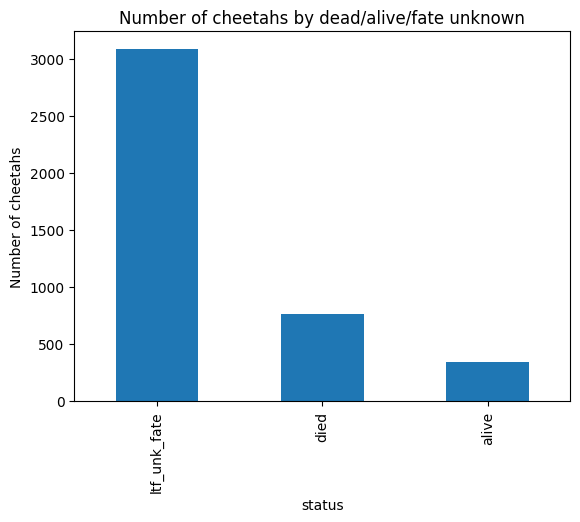

In [323]:
animal_count.plot(kind = 'bar')
plt.title("Number of cheetahs by dead/alive/fate unknown")
plt.ylabel("Number of cheetahs")
plt.xlabel("status")

Text(0.5, 0, 'Region')

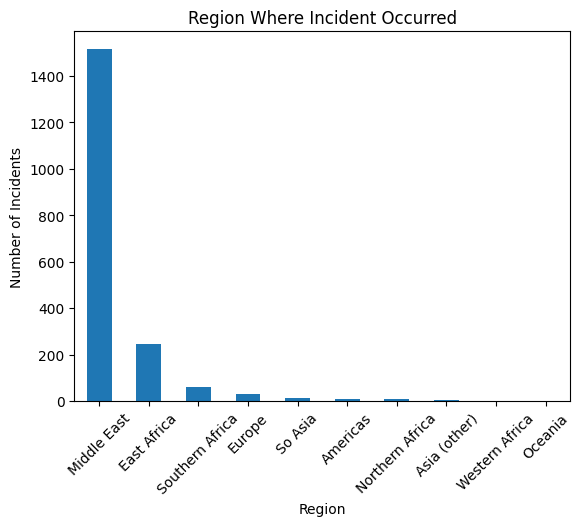

In [324]:
df['Region'].value_counts().plot.bar(rot = 45)
plt.title("Region Where Incident Occurred")
plt.ylabel("Number of Incidents")
plt.xlabel("Region")

In [325]:
# import additional datasets

df_corruption_id = pd.read_excel('Datasets/CPI_Corruption_Index_2015.xlsx')
df_inequality = pd.read_csv('Datasets/World_Inequality_Database_Data.csv')

In [326]:
# check data is loaded properly

df_corruption_id.head()

,Country Rank,Country/Territory,Country Code,Region,CPI 2015 Score,Number of Surveys Used,Std Error,Min,Max,90% Lower CI,...,Bertelsmann Foundation TI,Arican Development Bank,IMD World Competitiveness Year Book,Bertelsmann Foundation SGI,World Justice Project ROL,PRS Internationl Country Risk Guide,Economist Intelligence Unit,IHS Global Insight,PERC Asia Risk Guide,Freedom House NIT
0,1,Denmark,DNK,NaN,91,7,2.16,83,98,87,...,NaN,NaN,96.0,97.0,88.0,98.0,88.0,83.0,NaN,NaN
1,1,New Zealand,NZL,NaN,91,7,2.32,83,98,87,...,NaN,NaN,93.0,97.0,83.0,98.0,88.0,83.0,NaN,NaN
2,3,Finland,FIN,NaN,90,7,1.77,83,98,87,...,NaN,NaN,91.0,89.0,88.0,98.0,88.0,83.0,NaN,NaN
3,4,Sweden,SWE,NaN,89,7,1.71,83,98,86,...,NaN,NaN,87.0,89.0,88.0,98.0,88.0,83.0,NaN,NaN
4,5,Norway,NOR,NaN,88,7,2.24,81,98,84,...,NaN,NaN,84.0,81.0,90.0,98.0,88.0,83.0,NaN,NaN


In [327]:
df_inequality.head()

,Country,Percentile,sptinc_z_2015\nPre-tax national income \nTop 10% | share\n2015,shweal_z_2015\nNet personal wealth\nTop 10% | share | adults | equal split\n2015,agdpro_992_i_2015\nGross domestic product\nTotal population | average income or wealth | adults | individual | | ppp | constant (2022)\n2015,sptinc_z_2015\nPre-tax national income \nTop 1% | share\n2015,gptinc_992_j_2015\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\n2015,sptinc_992_j_2015\nPre-tax national income \nBottom 50% | share | adults | equal split\n2015,sptinc_992_j_2015\nPre-tax national income \nMiddle 40% | share | adults | equal split\n2015,sptinc_992_j_2015\nPre-tax national income \nTop 10% | share | adults | equal split\n2015,sptinc_992_j_2015\nPre-tax national income \nTop 1% | share | adults | equal split\n2015
0,Bahrain,p90p100,0.5572,0.6685,NaN,NaN,NaN,NaN,NaN,0.5572,NaN
1,Bahrain,pall,NaN,NaN,52810.9038,NaN,NaN,NaN,NaN,NaN,NaN
2,Bahrain,p99p100,NaN,NaN,NaN,0.2434,NaN,NaN,NaN,NaN,0.2434
3,Bahrain,p0p50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,p50p90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
df_clean.to_csv("Datasets/cheetah_clean.csv")